# Project1 - Iris Flower Classification

### Import Packages

In [2]:
import numpy as np                                        # Numpy to carry out mathematical calculations
import pandas as pd                                       # Pandas to create and manipulate dataframe
import matplotlib.pyplot as plt                           # Matplotlib to plot the data points onto a graph
import seaborn as sns                                     # Seaborn to carry out statistical graphical functions 
import sklearn
import warnings
warnings.filterwarnings('ignore')

### [1] Loading Dataset

In [3]:
df=pd.read_csv('J:\Courses\Oasis Infobyte (Internship)\Projects\Pro 1 (Iris Flower Classification)\Iris.csv')
df.head()                                        # To get top 5 rows from table

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### [2] Feature Engineering (Data Cleaning)

In [4]:
# Finding information about data using info in pandas
df.info()                 # shows datatype of column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Since, ID is not important we can remove the ID column

In [6]:
df = df.drop('Id', axis = 1)                    # deleting ID column
df.head() 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Species column is categorical col so we need to convert into numerical col

In [8]:
df['Species'].unique()                 # finding unique values in the column

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
a = df.select_dtypes(exclude = 'object')               # to get numerical col.
a

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
b = df.select_dtypes(include = 'object')               # to get categorical/text col.
b

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


### Map method - converting cat data to num data

In [11]:
# As we can see there are 3 unique values in the column, we need to convert cat. value to num. val using Map method

In [12]:
df['Species'] = df['Species'].map({'Iris-setosa':2, 'Iris-versicolor':1, 'Iris-virginica':0})
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


### EDA

#### Categorical Data

In [13]:
# Taking 2 plots for this analysis namely Countplot and Piechart

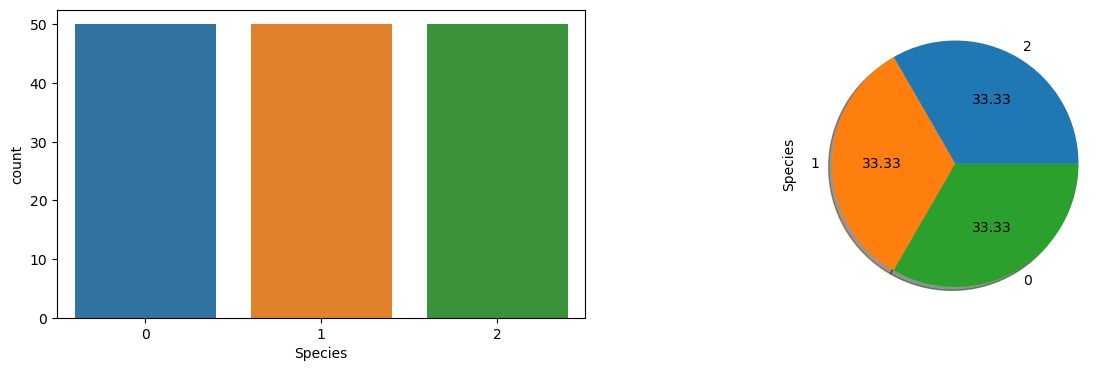

In [14]:
plt.figure(figsize=(15,4))
        
plt.subplot(121)
sns.countplot(x = df['Species'])                                                               # countplot

plt.subplot(122)
df['Species'].value_counts().plot(kind='pie', autopct='%.2f', radius=1, shadow=True)           # piechart

plt.show()

In [15]:
# 'Iris-setosa':2, 'Iris-versicolor':1, 'Iris-virginica':0
# We can observe that all 3 categories are equally avaialble

#### Numerical Data

In [16]:
# Taking 2 plots for this analysis namely Boxplot Distplot
# Instead of creating plots for each columns, we can use for loop which will create all 2 plots for all numerical columns

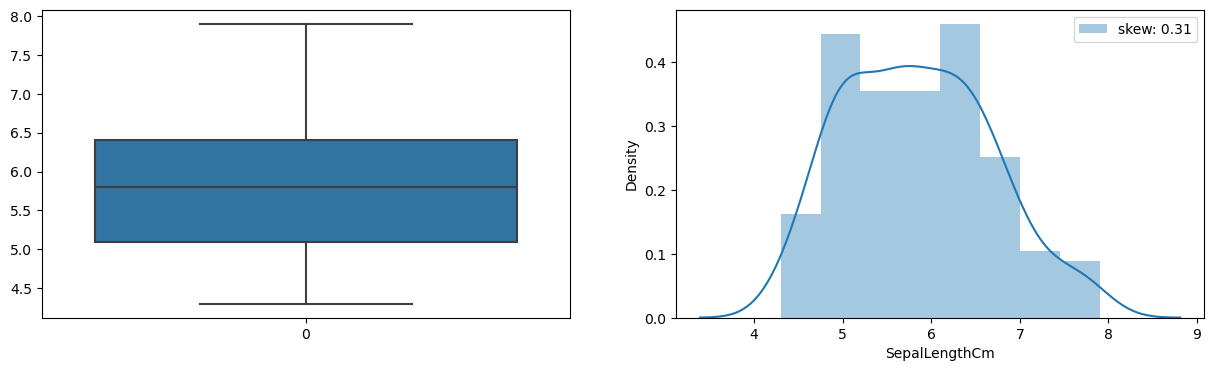

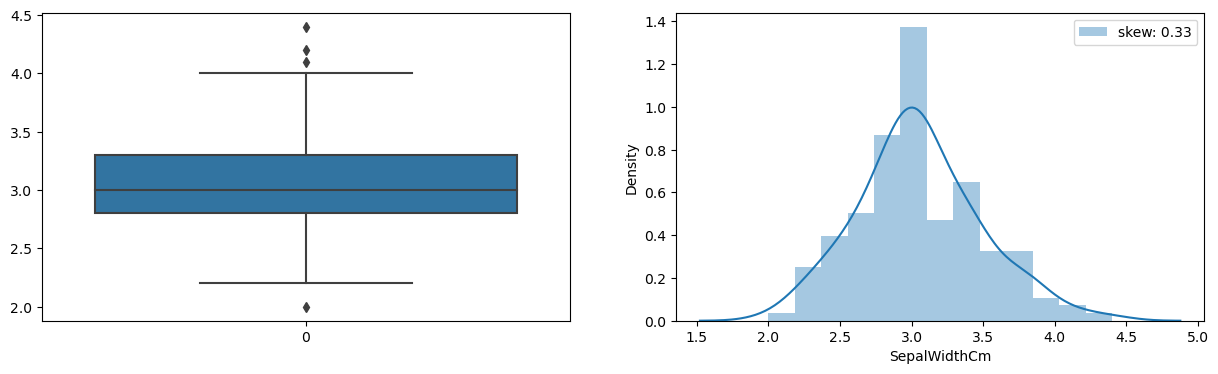

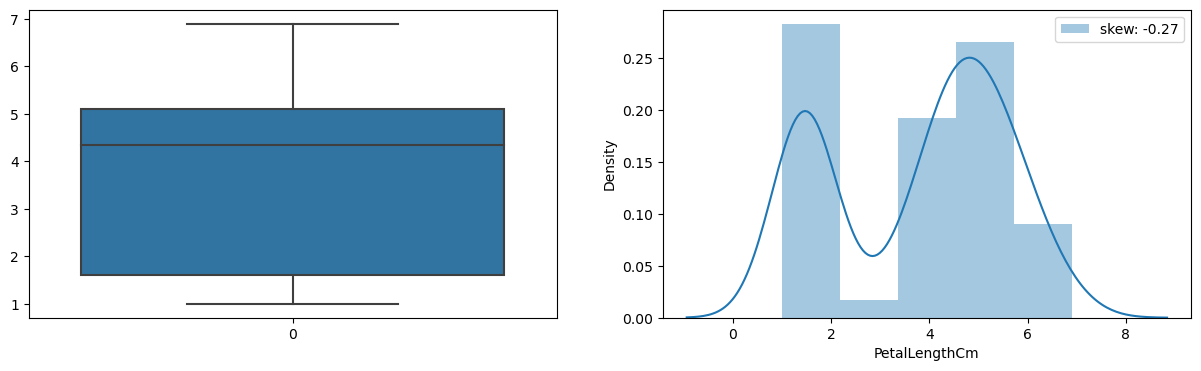

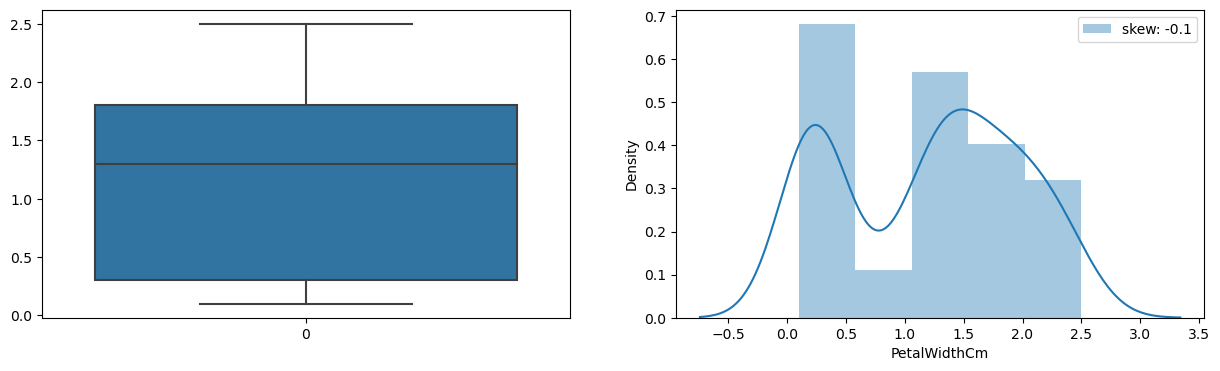

In [17]:
for col in a:
    plt.figure(figsize=(15,4))
    
    plt.subplot(121)
    sns.boxplot(a[col])                                                         # Boxplot: used to find outliers
    
    plt.subplot(122)
    sns.distplot(a[col], label="skew: " + str(np.round(a[col].skew(),2)))       # Distplot
    plt.legend()
    
    plt.show()

In [18]:
# from above analysis we can observe that outliers are present in 2nd column which is SepalWidthCm

### Train the model

In [19]:
# Split the data

# Give independent data to x & dependent data to y
x = df.drop(['Species'],axis=1)                 # independent 
y = df['Species']                               # dependent

In [20]:
# Splitting the data using train_test method
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# test_size indicates percentage of values for test i.e, 20% Data = Test & 80% Data = Train

In [21]:
len(x_train) , len(y_train)                   # 80% Random Data selected for train

(120, 120)

In [22]:
len(x_test) , len(y_test)                     # 20% Random Data selected for test

(30, 30)

In [30]:
# Give data to the model

# Now, giving training data to train the algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [31]:
reg1 = LogisticRegression()
reg1.fit(x_train , y_train)
print('Training accuracy = ',reg1.score(x_train,y_train))
print('Test accuracy = ',reg1.score(x_test,y_test))

y_test_pred = reg1.predict(x_test)
print('Test data confusion_matrix : ',confusion_matrix(y_test,y_test_pred))
print('Test data classification_report : ',classification_report(y_test,y_test_pred))

Training accuracy =  0.975
Test accuracy =  1.0
Test data confusion_matrix :  [[11  0  0]
 [ 0  9  0]
 [ 0  0 10]]
Test data classification_report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [93]:
# Prediction with other data

x_train.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [94]:
print('Type of species is',reg1.predict([[5.5,2.4,3.7,1]]))

Type of species is [1]


In [95]:
print('Type of species is',reg1.predict([[6,3,4.8,1.8]]))

Type of species is [0]


In [ ]:
# 'Iris-setosa':2, 'Iris-versicolor':1, 'Iris-virginica':0

In [45]:
res = pd.DataFrame({'Actual':y_test, 'prediction':y_test_pred})
res

,Actual,prediction
73,1,1
18,2,2
118,0,0
78,1,1
76,1,1
31,2,2
64,1,1
141,0,0
68,1,1
82,1,1


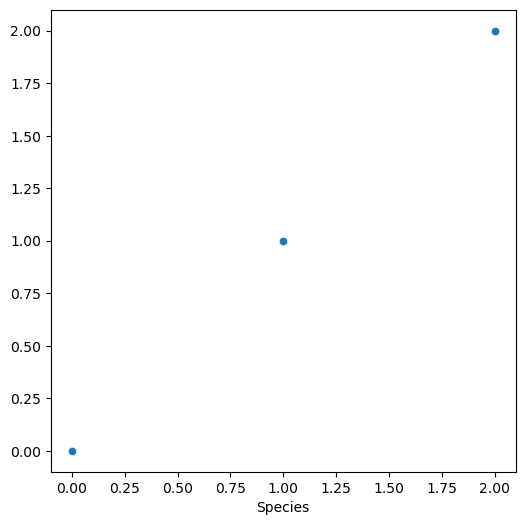

In [50]:
# Scatterplot (Num-Num)

plt.figure(figsize=(6,6))
sns.scatterplot(x = y_test, y = y_test_pred)
plt.show()